In [27]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../')
sys.path.append('../../external/hovernet')
sys.path.append('../../hedest')

import json
import os
import pickle
import torch
import scanpy as sc

PATH = '/home/luca/Documents/data/'

#'/cluster/CBIO/data1/lgortana/'
#'/home/luca/Documents/data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [28]:
# names
adata_name = 'CytAssist_11mm_FFPE_Human_Ovarian_Carcinoma'
sim_tag = "6_moco_clusters_800spots_balanced_dup_15mean_15var"
model_tag = "model_quick_alpha_0.0_lr_0.0001_weights_False_divergence_l2_seed_42"

In [29]:
import pandas as pd

data_path = os.path.join(PATH, adata_name)
sim_path = os.path.join(data_path, "sim")

#load image_dict
image_dict = torch.load(os.path.join(sim_path, f'{sim_tag}_image_dict_64.pt'))

#load ground truth
ground_truth = pd.read_csv(os.path.join(sim_path, f'{sim_tag}_gt.csv'), index_col=0)
ground_truth.index = ground_truth.index.astype(str)

In [30]:
#load model infos
model_dir = os.path.join('../../models/simulations/quick-sim-dup', sim_tag, model_tag)

with open(os.path.join(model_dir, 'info.pickle'), 'rb') as f:
    model_info = pickle.load(f)

# Analysis

In [31]:
from hedest.analysis.pred_analyzer import PredAnalyzer

analyzer = PredAnalyzer(model_info=model_info,
                        adjusted=True,
                        ground_truth=ground_truth, 
                        image_dict=image_dict
                        )

Loading predicted labels...
Loading true labels...
Use `add_attributes(seg_dict=your_seg_dict)` to add one.


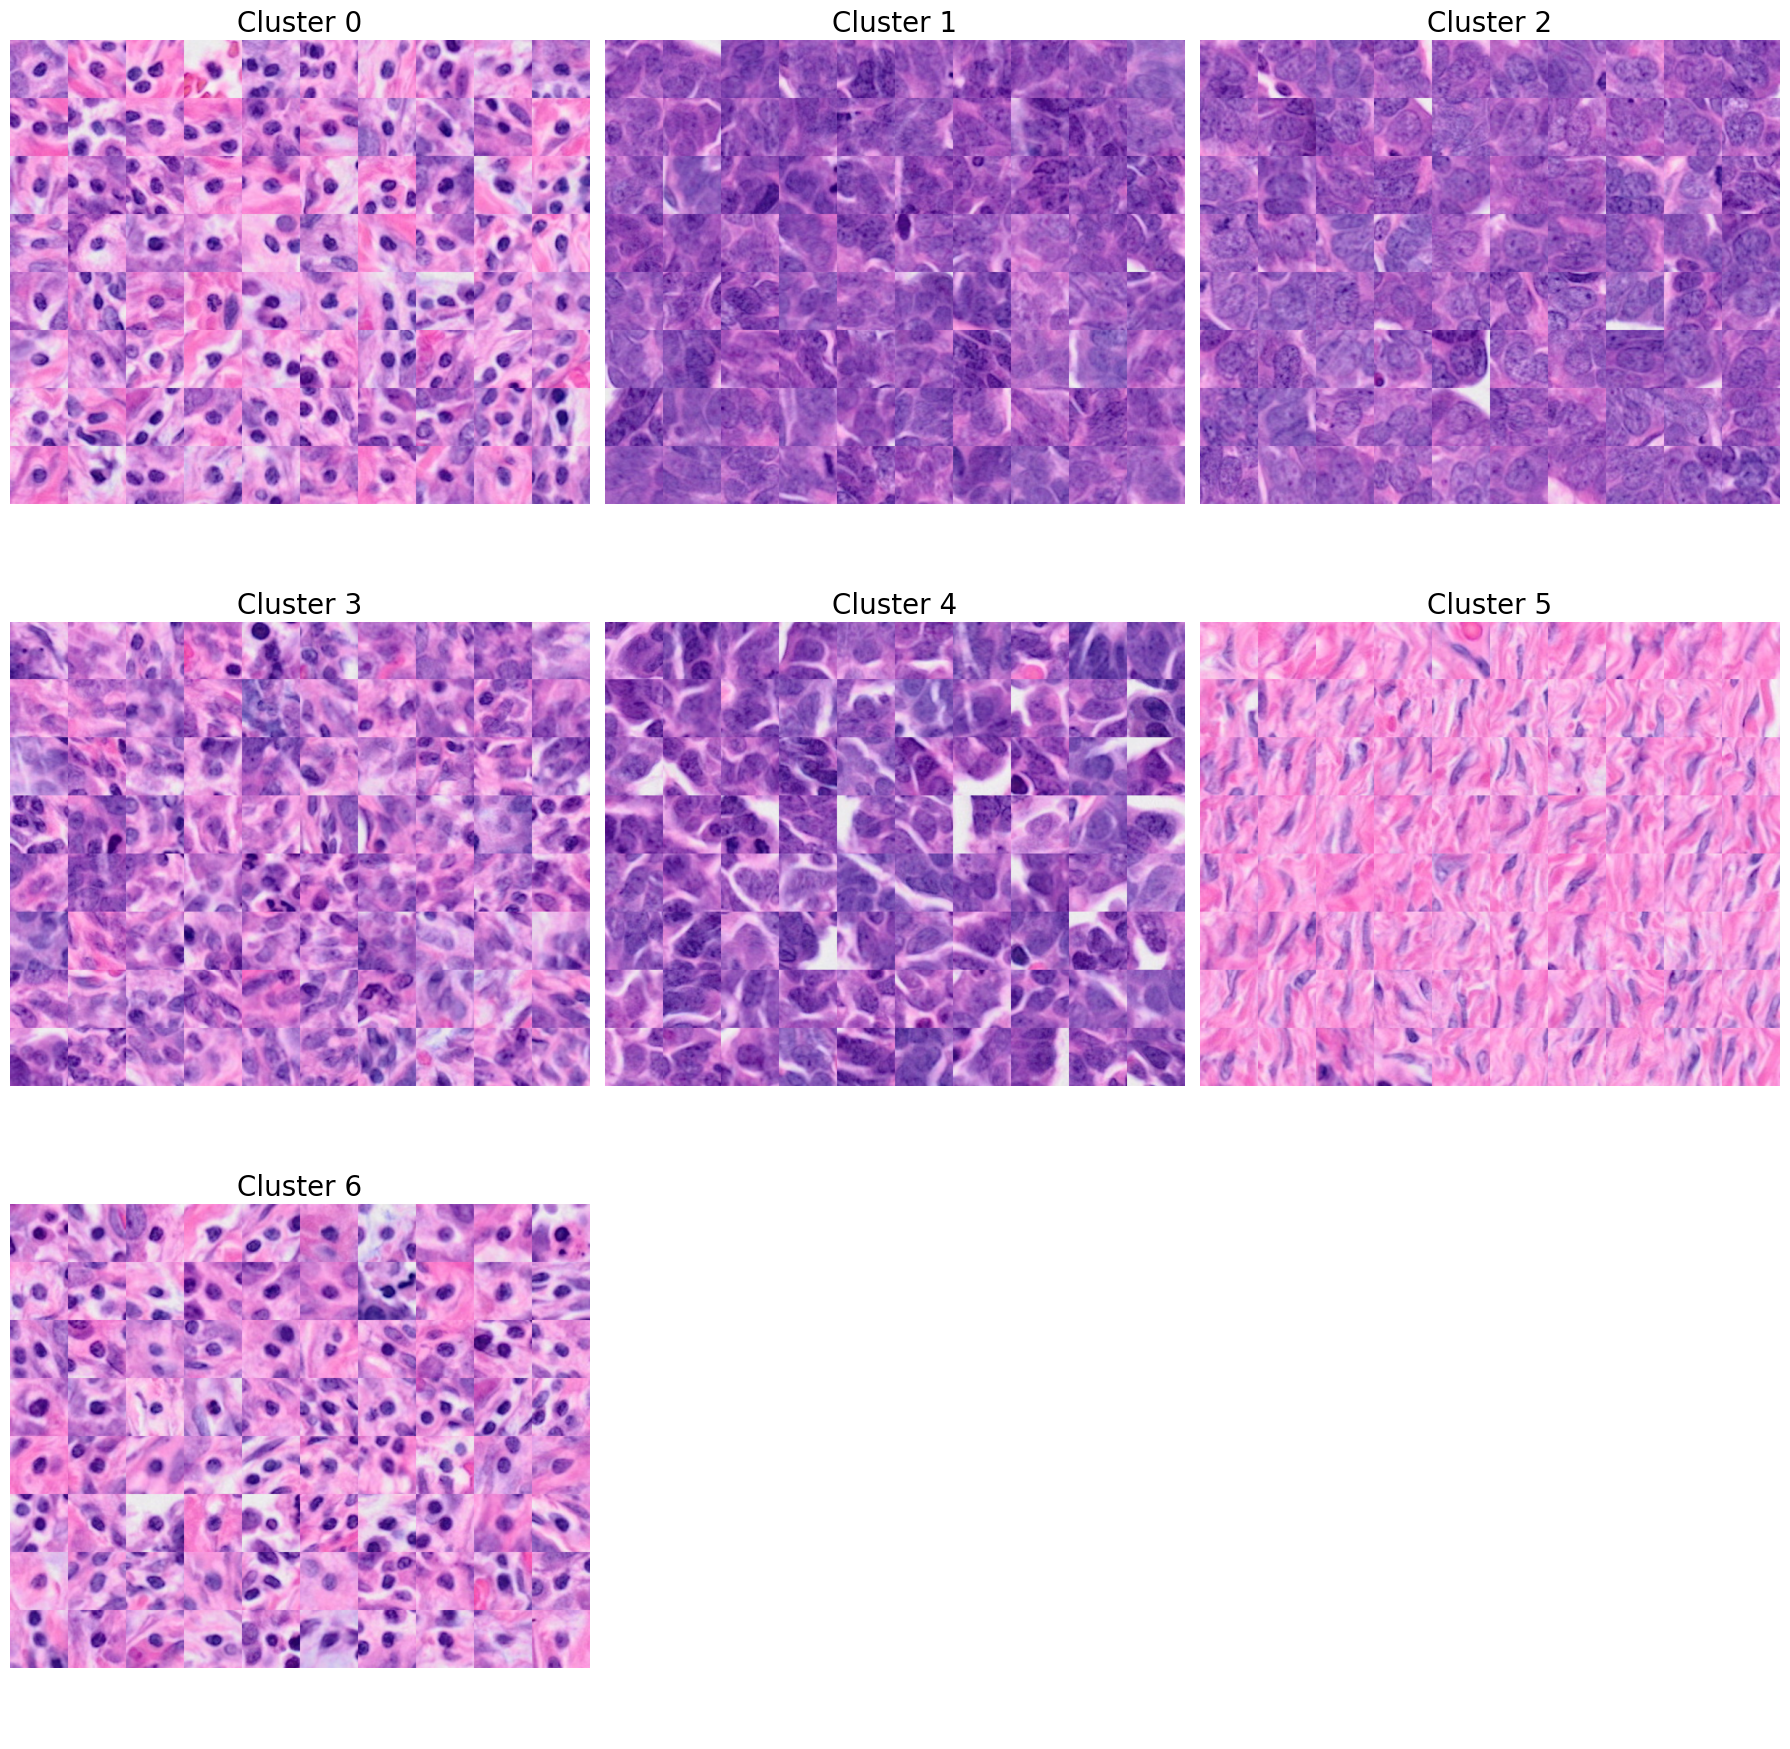

In [12]:
analyzer.plot_grid_celltype(n = 80, selection = 'max', show_probs=False)

In [32]:
cm = analyzer.evaluate_cell_predictions()['Confusion Matrix']

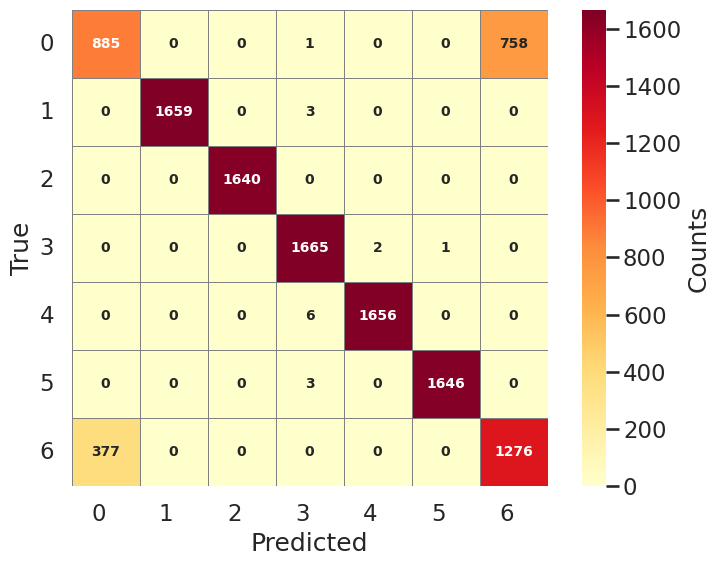

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_clean = cm.copy()
cm_clean.index = [label.replace("Cluster ", "") for label in cm.index]
cm_clean.columns = [label.replace("Cluster ", "") for label in cm.columns]

sns.set_context("talk")
sns.set_style("white")

plt.figure(figsize=(8, 6))

cmap = sns.color_palette("YlOrRd", as_cmap=True)

ax = sns.heatmap(
    cm_clean,
    cmap=cmap,
    annot=True,
    fmt="d",
    annot_kws={"fontsize": 10, "fontweight": "bold"},
    cbar_kws={"label": "Counts"},
    square=True,
    linewidths=0.5,
    linecolor='gray'
)

ax.set_xlabel("Predicted")
ax.set_ylabel("True")

plt.xticks(rotation=0, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
# plt.savefig("figures/confusion_matrix_adj_balanced.png", dpi=300, bbox_inches="tight")
plt.show()